In [1]:
# Load the necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, accuracy_score
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading male_stud file as a python pandas dataFrame
male_stud_info = pd.read_csv("male_stud.csv")
# Now, 'male_stud_info' is the dataframe that holds the data

To analyze the dataset we will use the functions like head(), tail(), info() and describe(). These functions will give the users insights into the datatypes of the variables, number of rows and columns.

In [3]:
male_stud_info.head(10)
# head() function prints the first rows from the dataset
# Here, male_stud_info.head(10) prints the frist 10 rows 

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14
5,1,1,2,2,0,1,0,1,0,5,4,3,2,11
6,1,1,1,3,0,0,0,1,1,4,5,2,0,16
7,1,1,1,1,3,0,1,1,0,5,5,5,16,5
8,0,1,1,1,0,1,1,1,0,3,1,3,4,10
9,1,1,1,2,0,0,0,1,0,4,4,1,0,15


In [4]:
male_stud_info.tail(10)
# tail() function returns last rows from the dataset
# Here, male_stud_info.tail(10) prints the last 10 rows from the dataset.

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
177,1,1,1,2,0,1,1,1,0,3,2,4,4,14
178,1,0,2,1,0,0,1,1,1,4,4,3,5,7
179,1,1,2,2,0,0,1,1,0,4,4,3,2,10
180,1,0,2,1,1,0,0,0,0,4,3,2,0,0
181,1,0,2,1,1,1,0,0,0,5,4,3,14,5
182,0,1,1,2,2,1,0,0,0,5,5,4,11,9
183,0,1,2,1,0,0,0,1,0,2,4,5,3,16
184,1,0,1,1,3,0,0,0,0,5,5,3,3,7
185,0,0,3,1,0,0,0,1,0,4,4,1,0,10
186,0,1,1,1,0,0,0,1,0,3,2,3,5,9


From the output we can interpret that there are 187 rows in the dataset. As we now know the number of rows inside the dataset, next, we will print the names of all the columns. In pandas, we have `columns` attribute that returns all the column names.

In [5]:
print(male_stud_info.columns)

Index(['large_family', 'lives_in_city', 'traveltime', 'studytime', 'failures',
       'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'absences', 'final_grade'],
      dtype='object')


or the other method to print all the column headers is using `list()` function and it can be executed as below

In [6]:
list(male_stud_info)

['large_family',
 'lives_in_city',
 'traveltime',
 'studytime',
 'failures',
 'paid',
 'activities',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'absences',
 'final_grade']

Both of the above codes logics will give us the same output. `columns` attribute returns Index object and `list()` function returns a list containing the same column headers.

Next, let's analyze the datatypes of objects inside the dataset.
For, this we can use `dtypes()` function in pandas which returns the datatype of each column.

In [7]:
male_stud_info.dtypes

large_family     int64
lives_in_city    int64
traveltime       int64
studytime        int64
failures         int64
paid             int64
activities       int64
internet         int64
romantic         int64
famrel           int64
freetime         int64
goout            int64
absences         int64
final_grade      int64
dtype: object

Interpreting the  above output we can tell that all the columns in the Dataframe are `integer` datatypes.

Next, let's check the structure of the dataset. For this, we can use `info()` function from the pandas framework to get more in depth information on the dataframe. 

In [8]:
print(male_stud_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   large_family   187 non-null    int64
 1   lives_in_city  187 non-null    int64
 2   traveltime     187 non-null    int64
 3   studytime      187 non-null    int64
 4   failures       187 non-null    int64
 5   paid           187 non-null    int64
 6   activities     187 non-null    int64
 7   internet       187 non-null    int64
 8   romantic       187 non-null    int64
 9   famrel         187 non-null    int64
 10  freetime       187 non-null    int64
 11  goout          187 non-null    int64
 12  absences       187 non-null    int64
 13  final_grade    187 non-null    int64
dtypes: int64(14)
memory usage: 20.6 KB
None


From the above output we can interpret that there are `187` entries[0-186]. There are `14` columns in the Dataframe. The `non-null` count column of the output table reveals that if there are any non-null entries inside our dataset and we can see that there are no missing values from the dataset. 

Next, we will perform in-depth analysis of columns using `describe()` function. This will allow us to perform numerical analysis on the dataset. It displays basic analysis like mean, standard deviation, minimum value, maximum value, etc.,

In [9]:
male_stud_info.describe()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.668449,0.764706,1.491979,1.764706,0.368984,0.390374,0.561497,0.850267,0.283422,4.000000,3.486631,3.197861,5.144385,10.914439
std,0.472034,0.425321,0.750405,0.808713,0.788152,0.489144,0.497536,0.357767,0.451870,0.898027,1.001924,1.135164,5.980749,4.495297
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,9.000000
50%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,11.000000
75%,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,8.000000,14.000000
max,1.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,38.000000,20.000000


Above we can see the numerical summaries of all the columns from the dataset. We can conclude that the average `travel time` is 1.49 hours and average `study time` is 1.7 hours per week. The average number of students who `failed` in their final exam is around 0.36. Average time male students spent on `paid activities` is approximately equal to 0.39 hours and time spent by them on `internet` is equal to 0.85 hours


Next, to perform graphical summary we will import `matplotlib` and `seaborn` libraries.

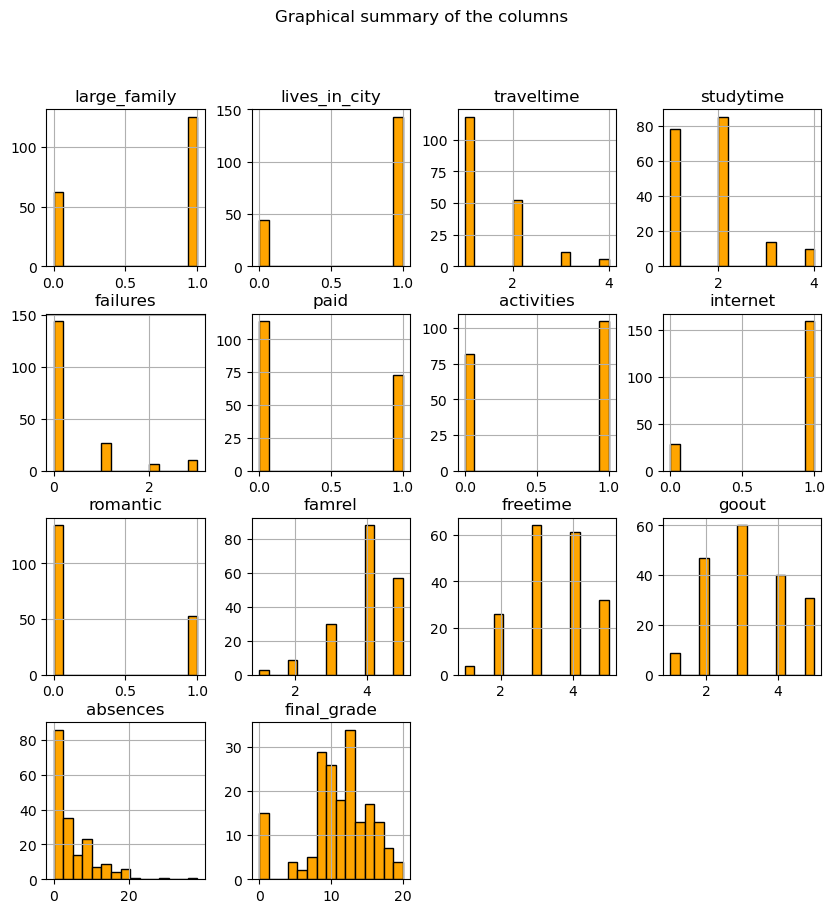

In [10]:
# Plot histograms for numerical variables
male_stud_info.hist(bins=15, figsize=(10, 10), color = "orange", ec = "black")
plt.suptitle("Graphical summary of the columns")
plt.show()

Text(0.5, 1.0, 'Histogram between Final Grade vs Study Time')

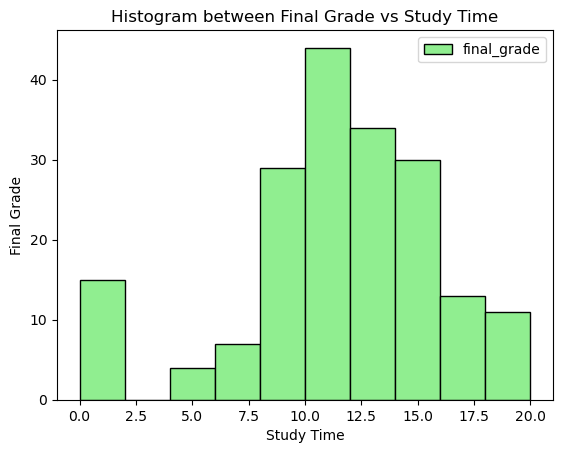

In [11]:
male_stud_info.plot(x="studytime", y="final_grade", kind="hist", color = 'lightgreen', ec = "black")
plt.xlabel("Study Time")
plt.ylabel("Final Grade")
plt.title("Histogram between Final Grade vs Study Time")

 - Above graph is plotted between `studytime` and `final grade` achieved by male students. 
 - We can see that weekly study time in the dataset is from 0 hours to 20 hours and we plotted it against the final grade received the male students. 
 - The x-axis represents study time and y-axis represents the final grade. 
 - Initially, we can see that students who studied from 0-2.5 hours have received the grade below 20. 
 - Students who studied for time between 7 hours to 12.5 hours received highest final grade. 
 - As the study time increase from 5 hours the grades also increased but soon we can notice that it decreased after 15hours per week. 
 - And even after putting in more than 15 hours per week of study students failed to achieve more than 30 in their final grade.

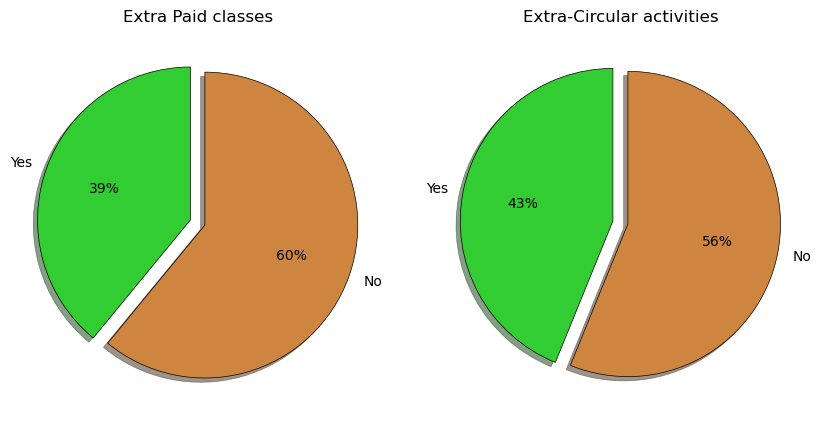

In [12]:
paid_act=male_stud_info['paid'].value_counts().values
extra_act=male_stud_info['activities'].value_counts().values
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Finding the highest value in paid_act
paid_act_max = paid_act.argmax()

# Finding the highest value in extra_act
extra_act_max = extra_act.argmax()

# Creating an explode list for the highest values from both the columns
explode_paid = [0.1 if i == paid_act_max else 0 for i in range(len(paid_act))]
explode_extra = [0.1 if i == extra_act_max else 0 for i in range(len(extra_act))]


#plotting the scatterplot for extra paid classes by male students 
axs[0].pie(paid_act, labels=['No','Yes'], autopct='%1d%%', explode = explode_paid, startangle=90, colors=['peru', 'limegreen'], shadow=True, 
                 counterclock=False, 
                 wedgeprops=dict(edgecolor='black', linewidth=0.5))
axs[0].axis('equal') 
axs[0].set_title('Extra Paid classes')

#plotting the scatterplot for extra circular activities by female students
axs[1].pie(extra_act, labels=['No','Yes'], autopct='%1d%%', explode = explode_extra, startangle=90, shadow=True, colors=['peru', 'limegreen'],
          counterclock=False, 
                 wedgeprops=dict(edgecolor='black', linewidth=0.5), radius = 1)
axs[1].axis('equal')  
axs[1].set_title('Extra-Circular activities')

# Show the plots
plt.show()

Interpretation:

- Extra paid classes - 
From the above piechart we can interpret that male students who enrolled into extra paid classes is 39% and students who did not join any paid classes is 60%.

- Extra circular activities - 
From the above pie chart we can conclude that more than 50% of the students did not show interest in participating in co-circular activities. Only 43% of them took part in extra-circular activities.

In [13]:
# Loading female_stud file as a python pandas dataFrame
female_stud_info = pd.read_csv("female_stud.csv")
# Now, 'female_stud_info' is the dataframe that holds the data

In [14]:
female_stud_info.head(10)
# head() function prints the first rows from the dataset
# Here, female_stud_info.head(10) prints the first 10 rows 

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,1,1,2,2,0,0,0,0,0,4,3,4,6,6
1,1,1,1,2,0,0,0,1,0,5,3,3,4,6
2,0,1,1,2,3,1,0,1,0,4,3,2,10,10
3,1,1,1,3,0,1,1,1,1,3,2,2,2,15
4,1,1,1,2,0,1,0,0,0,4,3,2,4,10
5,1,1,2,2,0,0,0,0,0,4,1,4,6,6
6,1,1,1,2,0,1,0,1,0,3,3,3,0,9
7,1,1,3,3,0,0,1,1,0,5,2,2,4,12
8,1,1,1,1,0,0,0,1,0,4,4,4,4,14
9,1,1,1,3,0,1,1,1,0,3,2,3,6,14


In [15]:
female_stud_info.tail(10)
# tail() function returns last rows from the dataset
# Here, female_stud_info.tail(10) prints the last 10 rows from the dataset.

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
198,1,0,4,3,0,0,0,1,0,4,3,2,2,10
199,1,1,2,3,2,1,0,1,1,5,4,3,4,15
200,0,0,1,2,0,1,1,1,0,5,4,3,4,10
201,1,1,1,2,0,1,0,1,1,4,1,3,0,15
202,1,0,1,2,0,1,1,1,0,4,5,4,17,10
203,1,0,2,3,0,1,0,0,0,5,3,3,2,10
204,1,0,3,1,0,1,1,1,1,4,4,3,7,6
205,1,0,1,3,1,0,1,1,0,5,4,2,0,0
206,0,1,1,2,0,1,0,1,0,4,3,4,0,8
207,1,1,2,2,1,0,1,0,0,1,1,1,0,0


From the output we can interpret that there are `208` rows in the dataset. As we now know the number of rows inside the dataset, next, we will print the names of all the columns. In pandas, we have `columns` attribute that returns all the column names.

In [16]:
print(female_stud_info.columns)

Index(['large_family', 'lives_in_city', 'traveltime', 'studytime', 'failures',
       'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'absences', 'final_grade'],
      dtype='object')


Similar to the above question we will also use the other method to print the column headers. 

In [17]:
list(female_stud_info)

['large_family',
 'lives_in_city',
 'traveltime',
 'studytime',
 'failures',
 'paid',
 'activities',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'absences',
 'final_grade']

Both the above codes gives the same output. `columns` attribute returns Index object and `list()` function returns a list containing the same column headers.

Next, let's analyze the datastypes of objects inside the dataset.
For, this we can use `dtypes()` function in pandas which returns the datatype of each column.

In [18]:
female_stud_info.dtypes

large_family     int64
lives_in_city    int64
traveltime       int64
studytime        int64
failures         int64
paid             int64
activities       int64
internet         int64
romantic         int64
famrel           int64
freetime         int64
goout            int64
absences         int64
final_grade      int64
dtype: object

From the above code output we can see that all the variables of female_stud_info data frame are of `integer` datatype.

Next, let's check the structure of the dataset. For this, we can use `info()` function from the pandas framework to get more in depth information on the dataframe.

In [19]:
female_stud_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   large_family   208 non-null    int64
 1   lives_in_city  208 non-null    int64
 2   traveltime     208 non-null    int64
 3   studytime      208 non-null    int64
 4   failures       208 non-null    int64
 5   paid           208 non-null    int64
 6   activities     208 non-null    int64
 7   internet       208 non-null    int64
 8   romantic       208 non-null    int64
 9   famrel         208 non-null    int64
 10  freetime       208 non-null    int64
 11  goout          208 non-null    int64
 12  absences       208 non-null    int64
 13  final_grade    208 non-null    int64
dtypes: int64(14)
memory usage: 22.9 KB


Similar to the Question-1, female_stud_info data frame also doesnt consist of any null or missing values. From the above output we can interpret that there are 208 entries[0-207]. There are 14 columns in the Dataframe. The non-null count column of the output table reveals that if there are any non-null entries inside our dataset and we can say that there are no missing values from the dataset.

Next we will check if all the indicators are same as those in the male group. For this we can iterate through a simple loop condition as shown below

In [20]:
if list(male_stud_info.columns) == list(female_stud_info.columns):
    print("The indicators are the same in both male and female groups.")
else:
    print("The indicators are different between the male and female groups.")

The indicators are the same in both male and female groups.


In [21]:
# given aplha value is 0.01
alpha_value = 0.01

for indicators in male_stud_info.columns: #iterating through each column that is an indicator
    t_stat, p_value = ttest_ind(male_stud_info[indicators], female_stud_info[indicators])

    print(f"\nTesting for the indicator : {indicators}")
    print("The measurements are")
    print(f"t-score: {t_stat}")
    print(f"p-value: {p_value}")

    # Comparing the calculated test statistics and p-values to evaluate the hypothesis
    if p_value < alpha_value:
        # if the calculated pvalue is less than the given alpha value we will accept the initial hypothesis to be true 
        # otherwise we will fail to reject the null hypothesis as dont have enough evidence to reject the null hypothesis
        print("Conclusion for the test is that we have enough evidence to reject the null hypothesis. There is a significant difference between the male and female groups.")
    else:
        print("Conclusion for this test is that there is enough evidence to reject the null hypothesis hence we will conclude by saying that no significant difference is observed between the male and female groups.")



Testing for the indicator : large_family
The measurements are
t-score: -1.7886773632900528
p-value: 0.07443689700483698
Conclusion for this test is that there is enough evidence to reject the null hypothesis hence we will conclude by saying that no significant difference is observed between the male and female groups.

Testing for the indicator : lives_in_city
The measurements are
t-score: -0.5653036030213555
p-value: 0.5721898495135425
Conclusion for this test is that there is enough evidence to reject the null hypothesis hence we will conclude by saying that no significant difference is observed between the male and female groups.

Testing for the indicator : traveltime
The measurements are
t-score: 1.1860551557953753
p-value: 0.2363170824741324
Conclusion for this test is that there is enough evidence to reject the null hypothesis hence we will conclude by saying that no significant difference is observed between the male and female groups.

Testing for the indicator : studytime
Th

In [22]:
# concat() function in pandas allows users to combine two or more dataframes.
combined_dataframe = pd.concat([male_stud_info, female_stud_info], axis = 0)# concatinates along rows
combined_dataframe.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14


In [23]:
combined_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0 to 207
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   large_family   395 non-null    int64
 1   lives_in_city  395 non-null    int64
 2   traveltime     395 non-null    int64
 3   studytime      395 non-null    int64
 4   failures       395 non-null    int64
 5   paid           395 non-null    int64
 6   activities     395 non-null    int64
 7   internet       395 non-null    int64
 8   romantic       395 non-null    int64
 9   famrel         395 non-null    int64
 10  freetime       395 non-null    int64
 11  goout          395 non-null    int64
 12  absences       395 non-null    int64
 13  final_grade    395 non-null    int64
dtypes: int64(14)
memory usage: 46.3 KB


From the above output we can conclude that there are `395` entries. There are `14` columns in the Dataframe. The non-null count column of the output table reveals that if there are any non-null entries inside our dataset and we can see that there are no missing values from the dataset.

In [24]:
pearson_corr_mat = combined_dataframe.corr()
pearson_corr_mat.abs()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
large_family,1.000000,0.072472,0.063493,0.073595,0.015769,0.013882,0.000113,0.000720,0.034395,0.022776,0.017695,0.023064,0.035783,0.081407
lives_in_city,0.072472,1.000000,0.328096,0.020912,0.078578,0.052800,0.051360,0.216842,0.005257,0.014258,0.034878,0.068835,0.027874,0.105756
traveltime,0.063493,0.328096,1.000000,0.100909,0.092239,0.066420,0.007766,0.111302,0.021962,0.016808,0.017025,0.028540,0.012944,0.117142
studytime,0.073595,0.020912,0.100909,1.000000,0.173563,0.167220,0.089877,0.059422,0.053285,0.039731,0.143198,0.063904,0.062700,0.097820
failures,0.015769,0.078578,0.092239,0.173563,1.000000,0.188039,0.069341,0.063451,0.093137,0.044337,0.091987,0.124561,0.063726,0.360415
paid,0.013882,0.052800,0.066420,0.167220,0.188039,1.000000,0.021382,0.153132,0.005536,0.000460,0.064253,0.010493,0.007435,0.101996
activities,0.000113,0.051360,0.007766,0.089877,0.069341,0.021382,1.000000,0.048663,0.019651,0.040687,0.089728,0.046088,0.013610,0.016100
internet,0.000720,0.216842,0.111302,0.059422,0.063451,0.153132,0.048663,1.000000,0.087122,0.032768,0.051286,0.074370,0.101701,0.098483
romantic,0.034395,0.005257,0.021962,0.053285,0.093137,0.005536,0.019651,0.087122,1.000000,0.063816,0.011182,0.007870,0.153384,0.129970
famrel,0.022776,0.014258,0.016808,0.039731,0.044337,0.000460,0.040687,0.032768,0.063816,1.000000,0.150701,0.064568,0.044354,0.051363


Pearson Correlation Coefficient is used to measure the linear correlation and the it generally between -1 and 1 indicating strength and direction of the relationship between two variables. 

Next we will find the indicators that are most correlated based on the above pearson correlation matrix.

In [25]:
# Firstly we will initiate an empty list to store all the values that we extract from the correlations
pairs = []
# Secondly, we will initiate a nested loop condition to loop through the correlation values from the above matrix
for row in range(len(pearson_corr_mat.columns)):
    for col in range(row + 1, len(pearson_corr_mat.columns)):
        corr_pair = (pearson_corr_mat.columns[row], pearson_corr_mat.columns[col])
        corr_value = pearson_corr_mat.iloc[row, col]
        pairs.append((corr_pair, corr_value))
sort_pairs = sorted(pairs, key=lambda x: abs(x[1]), reverse=True)#specifying the condition that we need absolute values of the coefficients

# Finally we will print those correlated pairs that are strongly related to each to other
print("Four most strongly correlated pairs from Pearson's Matrix is :")
for pair, corr_value in sort_pairs[:4]:
    print(f"{pair[0]} and {pair[1]}: {abs(corr_value)}")

Four most strongly correlated pairs from Pearson's Matrix is :
failures and final_grade: 0.36041494046164974
lives_in_city and traveltime: 0.3280955044457592
freetime and goout: 0.2850187149682024
lives_in_city and internet: 0.21684243568721281


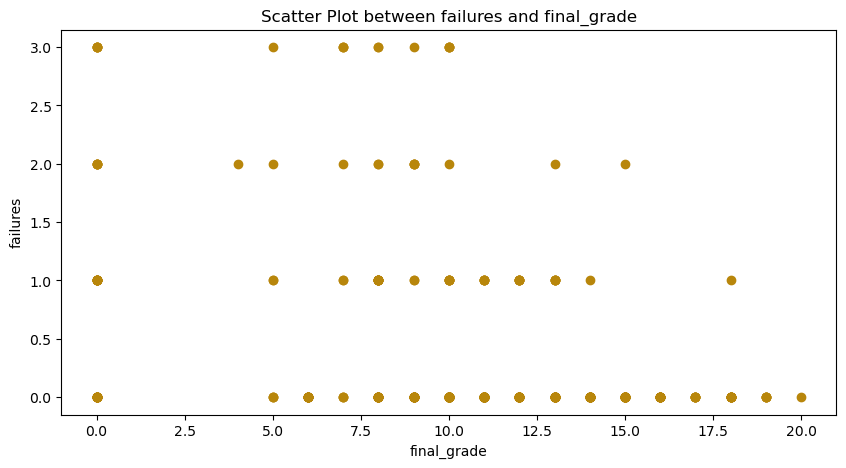

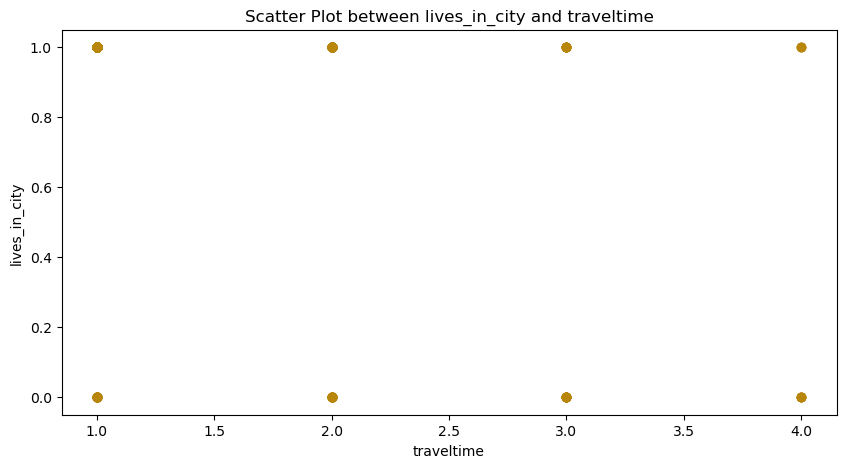

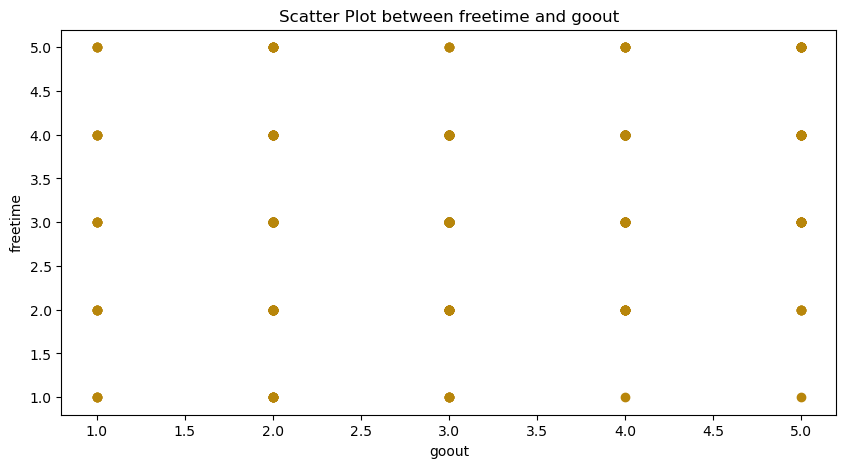

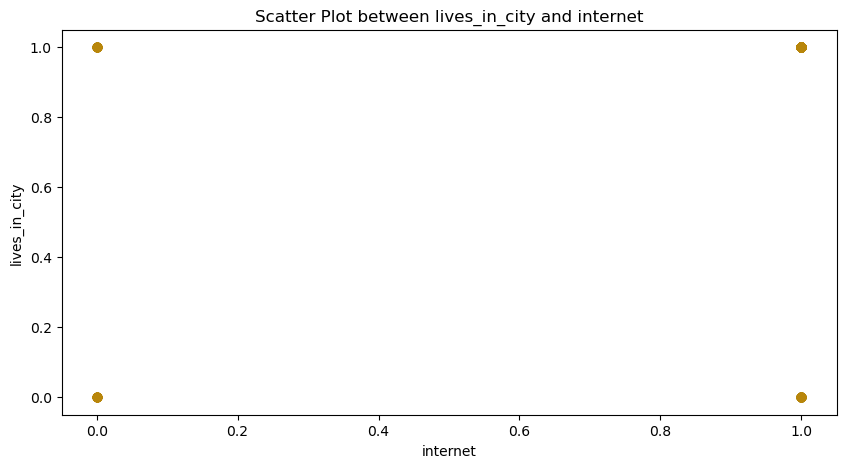

In [26]:
#extracting the Four most strongly correlated pairs from Pearson's Matrix from the above code 
high_corr_pairs = sort_pairs[:4]

# intialising a loop to iterate through 4 pairs setting up the title of the plot, labels for x and y axis
for (indicator1, indicator2), correlation_value in high_corr_pairs:
    plt.figure(figsize=(10,5))# setting the height and width of the scatter plots  
    plt.scatter(combined_dataframe[indicator2], combined_dataframe[indicator1], color = 'darkgoldenrod')  
    plt.title(f"Scatter Plot between {indicator1} and {indicator2}")
    plt.xlabel(indicator2)
    plt.ylabel(indicator1)
    plt.show()


By observing the scatter plots we can conclude that the results we obtained from the graph are not same as the correlation coefficients.

In [27]:
# Here we created a new column under the name Result which is based on final_grade 
combined_dataframe["Result"] = combined_dataframe['final_grade'].apply(lambda x: "PASS" if x >= 10 else "FAIL")
# above we specified the conditions based on Portuguese system
combined_dataframe.head(10)

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade,Result
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15,PASS
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11,PASS
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19,PASS
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15,PASS
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14,PASS
5,1,1,2,2,0,1,0,1,0,5,4,3,2,11,PASS
6,1,1,1,3,0,0,0,1,1,4,5,2,0,16,PASS
7,1,1,1,1,3,0,1,1,0,5,5,5,16,5,FAIL
8,0,1,1,1,0,1,1,1,0,3,1,3,4,10,PASS
9,1,1,1,2,0,0,0,1,0,4,4,1,0,15,PASS


Above we can see the combined_dataframe with a new column name `Result` that holds values PASS or FAIL based on students grades according to the Portuguese system.

In [28]:
# dividing the data into predictor and target variable
# x indicates predictor variables
# y indicates target variable
X = combined_dataframe.drop(['final_grade', 'Result'], axis=1) 
Y = combined_dataframe['Result']
# next we will divide the dataset into training sets and testing sets
#this is done to check how well a model behaves with new data once it is trained
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the predictor variables
scaler = StandardScaler()
spv_Xtrain = scaler.fit_transform(X_train)
spv_Xtest = scaler.transform(X_test)


In [29]:
# fit a linear regression model and training it
logreg_model = LogisticRegression()
logreg_model.fit(spv_Xtrain, Y_train)
# Once fitted model is trained we will test it on testing sets
Y_pred = logreg_model.predict(spv_Xtest)
# Display coefficients and intercept
print("Coefficients of the logistic regression model are :")
coefficients = pd.DataFrame(logreg_model.coef_, columns = X.columns)
display(coefficients)

intercept = logreg_model.intercept_[0]
print("\nIntercept of the logistic regression model is - \n")
print(intercept)

Coefficients of the logistic regression model are :


,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,-0.214768,0.048093,0.013269,-0.03811,-0.665361,0.166962,0.030715,0.11099,-0.118877,0.045097,0.165178,-0.366919,-0.046512



Intercept of the logistic regression model is - 

0.7787350235312138


Interpreting the fitted linear regression model. We will interpret the fitteed model using Classification Report, Accuracy scores and confusion matrix. 

Confusion Matrix will provide a tabulated summary of performance of the model. It consists of counts of counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). Every entry in the matrix represents combination of predicted and actual class labels. 

Classification Report provides inputs like Precision, Recall, and F1-Score of the regression model. Where precision measures the accuracy of positive predictions. These above factors provides insights into how a model performs for different classes.


In [30]:
# For interpreting the fitted model, first we will build a confusion matrix. For that we can use confusion() function.
# Confusion matrix is used to evaluate the performance of a classification model. It shows the count of true positive, true negative, 
# false positive, and false negative predictions made by the model. Each row in the matrix represents the actual class, 
# while each column represents the predicted class.
print("Confusion Matrix of the fitted model is :")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix of the fitted model is :
[[ 9 17]
 [ 2 51]]


In [31]:
# Producing a classification report is another way to evaluate the performance of the classification model
# It gives more insights into the models performance like 'precision', 'recall', 'f1-score', 'support'
print("\nClassification Report of the fitted model is:")
print(classification_report(Y_test, Y_pred))


Classification Report of the fitted model is:
              precision    recall  f1-score   support

        FAIL       0.82      0.35      0.49        26
        PASS       0.75      0.96      0.84        53

    accuracy                           0.76        79
   macro avg       0.78      0.65      0.66        79
weighted avg       0.77      0.76      0.73        79



In [32]:
# Calculating the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.759493670886076


Interpretation:
- The classification report is divided into 2 classes PASS & FAIL. 
- Precision gives us the correctly predicted positive observations from the total number of positive observations. 
- From our classification report we can say that, out of 26 instances of `FAIL` the precision is 0.82 or `82%` whereas for `PASS` component, out of 53 components the precision is 0.75 or `75%`. 
- Support provides actual occurences of the instances in our dataset. After observing recall anf f1-scores. 
- We can conclude that the fitted model performs well in identifying PASS instances but in contrast it doesn't perform well in identfying FAIL instances.
- Accuracy rate is 72% on the test dataset, which shows that the model successfully predicts the academic outcomes of instances

In [33]:
def fs_logistic(df, x, y): #x is a list of predictor variable names and y is the target variable name.
    list_of_var_selected = [] # keeps a track of selected variables  
    acc_current_value = 0 # stores the current best accuracy
    # Initializing a loop that runs on all the available predictor variables
    while x:
        list_acc = []

        for i in x:
            model_data = df[list_of_var_selected + [i, y]]
            X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
                model_data.drop(columns = [y]),
                model_data[y],
                test_size = 0.2,
                random_state = 101
            )
            scaler = StandardScaler()
            X_train_scaled_fs = scaler.fit_transform(X_train_fs)
            X_test_scaled_fs = scaler.transform(X_test_fs)
            X_train_scaled_fs = pd.DataFrame(X_train_scaled_fs, 
                                             columns=model_data.drop(columns=[y]).columns)
            X_test_scaled_fs = pd.DataFrame(X_test_scaled_fs, 
                                            columns=model_data.drop(columns=[y]).columns)
            #we are splitting the model into two sets - training set and testing set and saving the 
            #scaled predictors into newdataframes
            model = LogisticRegression()
            model.fit(X_train_scaled_fs, y_train_fs)
            # Above we fitted a logistic model on the scaled parameters 
            y_pred = model.predict(X_test_scaled_fs)
            acc = accuracy_score(y_test_fs, Y_pred)

            list_acc.append((i, acc))

        if not list_acc:
            break

        best_var, max_acc = max(list_acc, key=lambda x: x[1])

        if max_acc > acc_current_value:
            list_of_var_selected.append(best_var)
            acc_current_value = max_acc
            x.remove(best_var)
        else:
            break

    # Fit the final logistic regression model using selected predictors
    X_final_logistic = X_train[list_of_var_selected]
    final_model_logistic = LogisticRegression()
    final_model_logistic.fit(X_final_logistic, Y_train)

    # Evaluate the model
    y_pred_final = final_model_logistic.predict(X_test[list_of_var_selected])

    # Display the selected predictors and final model summary
    print("Selected Variable is :", list_of_var_selected)
    print("Intercept:", final_model_logistic.intercept_[0])
    print("Coefficients:", final_model_logistic.coef_[0])

    # Printing the classification report for the fitted model
    print("\nClassification Report of the Logic Regression model:")
    print(classification_report(Y_test, y_pred_final))
    
    # Print the confusion matrix of the fitted model
    print("\nConfusion Matrix of the Logic Regression model:")
    print(confusion_matrix(Y_test, y_pred_final))

# performing forward selection and logistic regression on the specified data.
fs_logistic(combined_dataframe, X.columns.tolist()[:-1], 'Result')

Selected Variable is : ['large_family']
Intercept: 1.0567207250963422
Coefficients: [-0.47223533]

Classification Report of the Logic Regression model:
              precision    recall  f1-score   support

        FAIL       0.00      0.00      0.00        26
        PASS       0.67      1.00      0.80        53

    accuracy                           0.67        79
   macro avg       0.34      0.50      0.40        79
weighted avg       0.45      0.67      0.54        79


Confusion Matrix of the Logic Regression model:
[[ 0 26]
 [ 0 53]]


#### Interpretation:
##### Confusion Matrix
provides more detailed breakdown into model's performance. The matrix can broken down into 4 parts as:
1. True Negative Value(TN) - the top left corner 0 represents the count of true negatives in the model. True Negative value is the number of instances that were correctly predicted as the negative class
2. False Positives(FP) - The top right corner 26 represents the count of the False Positives in the model. False Positives are  number of instances that were incorrectly predicted as the positive class.
3. False Negatives(FN) - The bottom left corner 0 represents the count of the False Negatives in our model. False Negatives are number of instances that were incorrectly predicted as the negative class. 
4. True Positives(TP) - the bottom right corner 53 represents the count of the True Positives in the model. True Positives are number of instances that were correctly predicted as the positive class.

- In summary we can say that the model is biased in predicting 'PASS' class.
- 0 represents that the model is not identifying any 'FAIL' instances.
- Accuracy of the model is 0.67 or 67% that can be calculated as the ratio of correctly predicted instances to the total instances.
- Support shows the number of true occurences of each class. For 'PASS' class we have 53 instances and for 'FAIL' class we have 26 instances

In [34]:
# firstly we will copy the combined dataset into a new data frame.
# we can use copy() function to copy one data frame into another
new_df = combined_dataframe.copy()
# Droping the previously created 'result' column
new_df.drop(["Result"], axis = 1, inplace = True)
# checking if the changes are applied to the new dataframe or not
new_df.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14


In [35]:
X_rf = new_df.drop('final_grade', axis = 1)
y_rf = new_df['final_grade']

In [36]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 101)

In [37]:
# Setting the reproducibilityto 101 using seed() function
np.random.seed(101)

# Create a random forest regression model with 10 trees
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 101)

# fitting the model using training data
rf_model.fit(X_train_rf, y_train_rf)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a dataframe to show the feature importances of all the variables
feature_importance_df = pd.DataFrame({'Feature': X_rf.columns, 'Importance': feature_importances})

# Sort the DataFrame in decreasing order by their importance
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# Show the top features of the random forest regression model
print(feature_importance_df)

          Feature  Importance
12       absences    0.217426
4        failures    0.166293
11          goout    0.137604
10       freetime    0.102563
9          famrel    0.074481
3       studytime    0.066444
8        romantic    0.043998
2      traveltime    0.042947
6      activities    0.035452
0    large_family    0.030166
7        internet    0.028580
5            paid    0.027518
1   lives_in_city    0.026527


The above model is important in understanding the which features contribute the most to the predictive power of the Random Forest model. From the above output we can say that the top 4 features that have higher importance values are `absences`, `failure`, `goout` and `freetime`.

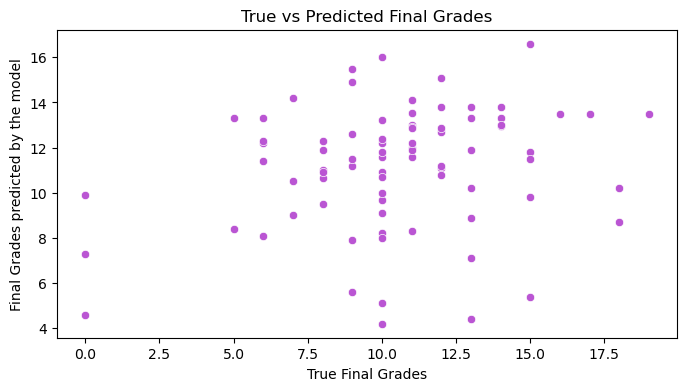

In [38]:
# using the model to predict the final grades
y_pred_rf = rf_model.predict(X_test_rf)

# creating a dataframe names `prediction_df_rf` that can store true final grades
prediction_df_rf = pd.DataFrame({"True Final Grades": 
                                 y_test_rf, "Model Predicted Final Grades": y_pred_rf})

# generating a scatterplot
plt.figure(figsize = (8, 4))
# it is plotted between `True Final Grades` and Predicted Final Grades`
sns.scatterplot(x = "True Final Grades", y = "Model Predicted Final Grades", 
                data = prediction_df_rf, color = 'mediumorchid')

# Setting the title of the graph, x-axis and y-axis lables
# we can use title(), xlabel() and ylabel() functions to set the values
plt.title('True vs Predicted Final Grades')
plt.xlabel('True Final Grades')
plt.ylabel('Final Grades predicted by the model')
plt.show()

Interpretation:

The above graph is plotted between true values vs model predicted valus of final grades. X axis takes the values of True values of final grades  and Y-axis takes the values of model predicted final grade values.

By observing the above graph we can say that there is a positive correlation between the true final grades and model predicted final grades; which means as the values of true final grades increase the values of model predicted final grades also increase.
We can see that there are few points that fall in lower left corner of the graph which indicates that the predicted values are higher than that of the true values. This also means that model performs badly in predicting the grades of these students. 

In [39]:
# Define the number of trees to evaluate
n = [5, 10, 50, 100, 500, 1000, 5000]

# Create 2 lists to store mean and standard error of the model performance metrics
mean_mse = []
std_mse = []
# Set the number of models to repeat
repeat = 20
# Perform model and predict for each no. of trees
for i in n:
    mse_list = []
    for _ in range(repeat):
        
        # Build "n" no. of trees in random forest regression model
        model_rf = RandomForestRegressor(n_estimators = i, 
                                         random_state = np.random.randint(1, 100))

        # Obtain RMSE scores from the cross validation technique
        kfold = KFold(n_splits = 4, shuffle = True, 
                      random_state = np.random.randint(1, 100))
        mse = -cross_val_score(model_rf, X_rf, y_rf, cv = kfold, 
                               scoring = 'neg_mean_squared_error')
        mse_list.extend(mse)
        del model_rf
        del kfold
        del mse

    # Obtain std error and average of MSE
    mse_mean = np.mean(mse_list)
    mse_std = np.std(mse_list) / np.sqrt(repeat)

    mean_mse.append(mse_mean)
    std_mse.append(mse_std)

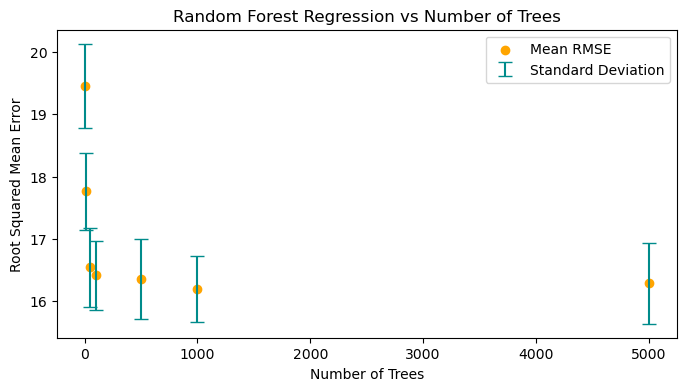

In [40]:
# Plot the graph
plt.figure(figsize=(8, 4))
plt.scatter(n, mean_mse, label='Mean RMSE', color='orange')
plt.errorbar(n, mean_mse, yerr=std_mse, fmt='none', ecolor='darkcyan', capsize=5, label='Standard Deviation')
plt.xlabel('Number of Trees')
plt.ylabel('Root Squared Mean Error')
plt.title('Random Forest Regression vs Number of Trees')
plt.legend()
plt.show()

Interpretation:

The above graph is plotted between Root Squared Mean Error and the number of trees in a random forest regression model. We generally use RSME to measure prediction levels of a model on the target value. From the graph we can say that RSME and number of trees are inversely proportional to each other. As the Mean RSME decreases the number of trees increases. 

Specifically, we can observe that the mean RSME decreases from above 19 to below 17 as the number of trees increase from 1000 to 3000. The standard deviation of RSME decreases as the number of trees increases. From this we can say that the optimal number of trees to use is 3000 as we can see that the model is consistent in its predictions after 3000 trees.

- A random forest is composed of random trees that are built using a random data sample and a random subset of features at decision points. We check the model's responsiveness by tweaking the values during training the random factors and record the changes. This process evalutes the model's consistency over the unseen data during testing phase. Random forests also reduce the overfitting of the data as the training dataset is selected at random to train. 

- A random subset of features is considered for splitting at each node in each tree of the forest. Additionally, each tree's training dataset is created by randomly selecting samples with replacement from the original dataset. specific trees generated can vary due to the random processes involved. 

- Fitting the model with different states allows evaluation of model generalizaton across different variations of the training data.

- Fitting the model multiple times with different states enables an assessment of the model's consistency in performance across various runs. Variations in performance metrics across different random states may indicate sensitivity to the introduced randomness during training.


- Accuracy is enhanced by combining multiple Random Forests and diverse trees are created by fitting the model multiple times.

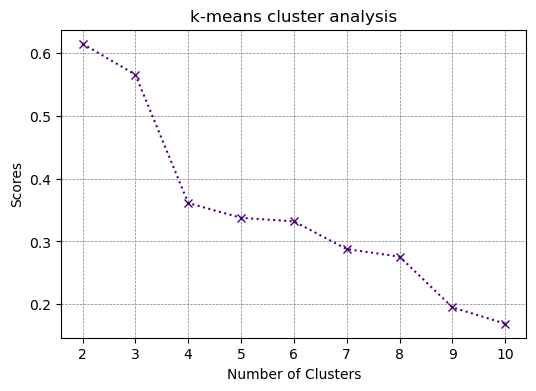

In [61]:
kmeans_new_df = combined_dataframe.copy()
kmeans_new_df.drop(["Result"], axis = 1, inplace = True)
kmeans_list = range(1, 11)

# Create an empty list to get the model performance metrics
score = []

# Run the kmeans model for different no. of clusters ranging from 1 to 10
for i in kmeans_list:
    model_kmeans = KMeans(n_clusters=i, n_init=10, random_state=101)
    model_kmeans.fit(X_rf)

    # iterating a loop to get the score
    if i > 1:
        score.append(metrics.silhouette_score(X_rf, model_kmeans.labels_))

plt.figure(figsize=(6, 4))
plt.plot(kmeans_list[1:], score, marker='x', linestyle = ':', color = 'indigo')

# Setting the title of the graph and lables of axes
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.title('k-means cluster analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')

plt.show()

In [43]:
# finding out the optimal number of clusters
best_optnum = np.argmax(score) + 2
print('Number of Optimal Clusters is:', best_optnum)

Number of Optimal Clusters is: 2


Interpretation:

- The graph shows the performance of a model in terms of inertia. Inertia is a measure of how well a model clusters the data. A lower inertia score indicates a better model.
- A model with more clusters is able to capture more detail in the data. 
- The inertia decreases as the number of clusters increases. 
- This indicates that the model is able to cluster the data as the number of clusters increases. 
- We can also observe that as the number of clusters increase from 2 to 5 the inertia deacreases. 

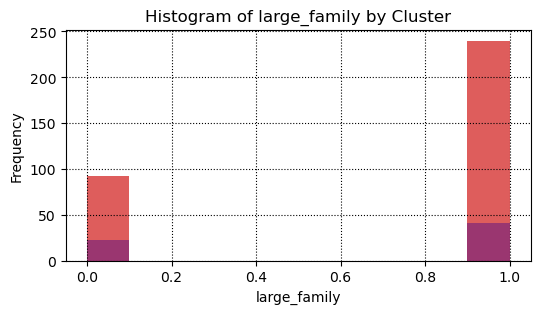

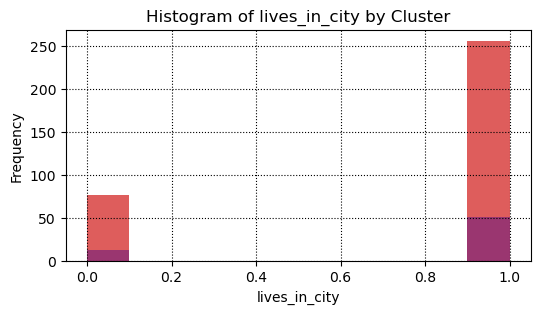

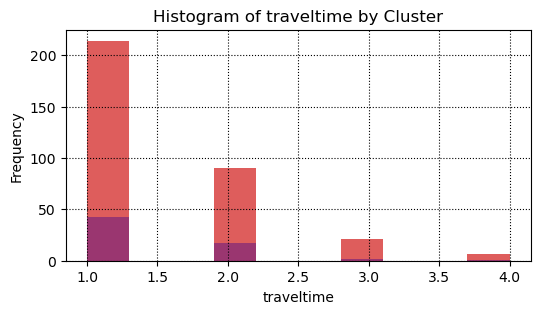

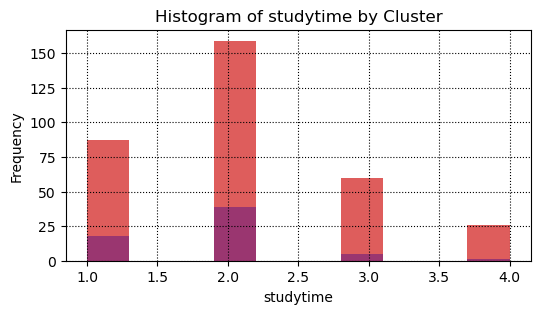

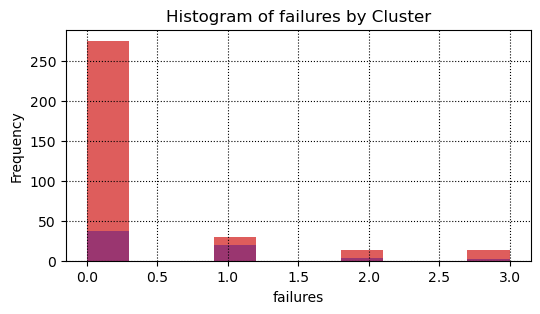

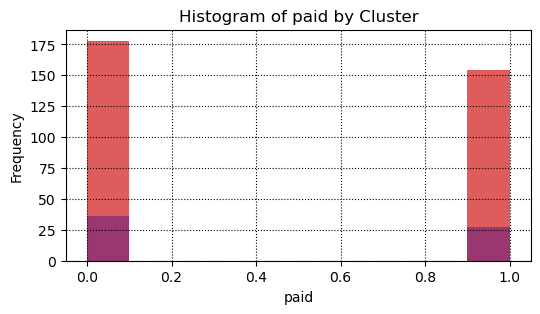

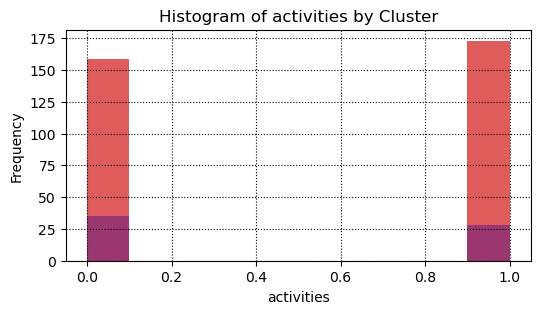

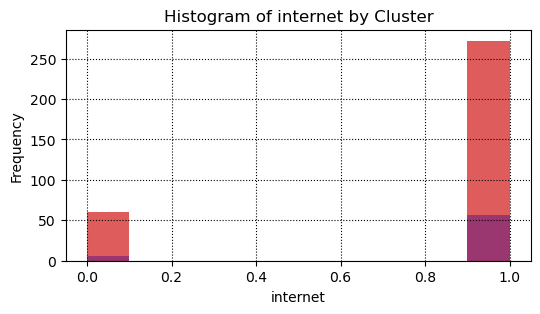

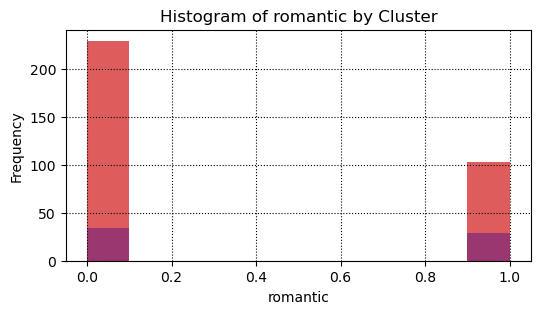

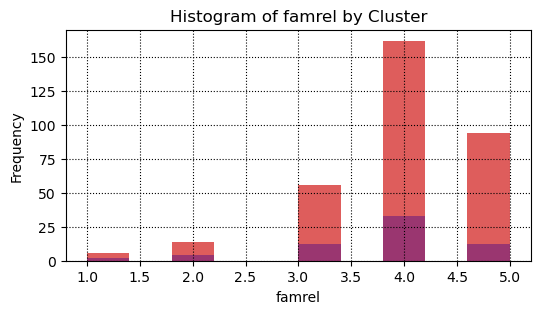

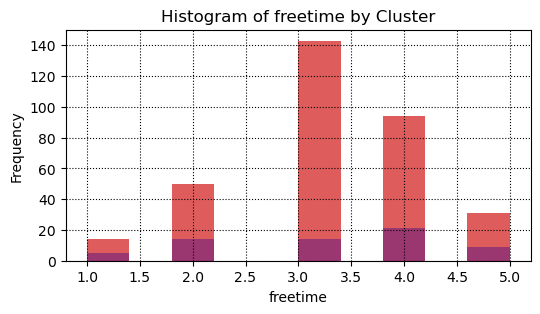

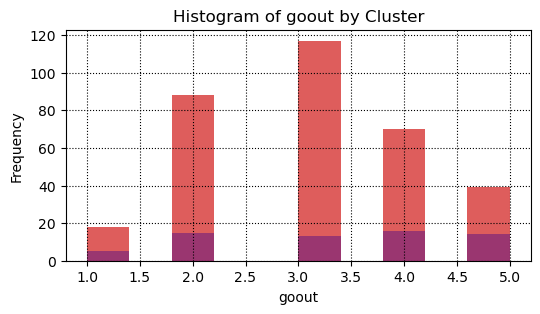

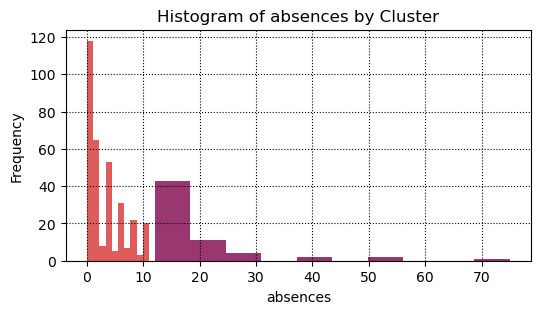

In [58]:
# taking the optimal number of cclusters from the previous code 
optimal_best = 2

custom_palette = sns.color_palette("flare", n_colors=best_optnum)

# Building a model with the choosen optimal number of clusters
km_best_model = KMeans(n_clusters=optimal_best, n_init=10, random_state=42)
# Fitting the model and assigning the clusters
combined_dataframe["Cluster"] = km_best_model.fit_predict(X_rf)

# Plot histograms for each variable, with the data separated by cluster
for i in X_rf.columns:
    plt.figure(figsize=(6, 3))

    for j in range(optimal_best):
        plt.hist(X_rf[combined_dataframe['Cluster'] == j][i], label=f'Cluster {j}', color=custom_palette[j])

    # Setting the title of the graph and x-axis and y-axis labels
    plt.grid(True, linestyle=':', color='black')
    plt.title(f'Histogram of {i} by Cluster')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [46]:
# Initially let's calculate the absolute difference in means between clusters
difference = model_kmeans.cluster_centers_
dis_vars = np.abs(difference[1, :] - difference[0, :])

# arrange in descending order of the above calculated absolute difference in means
orderedindices = np.argsort(dis_vars)[::-1]
orderedvariables = pd.DataFrame(combined_dataframe.columns[orderedindices], columns=["featured_variables"])

# Print the most discriminatory variables
print("Most Discriminatory Variables of K_means:\n")
print(orderedvariables)

Most Discriminatory Variables of K_means:

   featured_variables
0            absences
1            freetime
2           studytime
3               goout
4            failures
5                paid
6          traveltime
7            internet
8              famrel
9            romantic
10         activities
11       large_family
12      lives_in_city


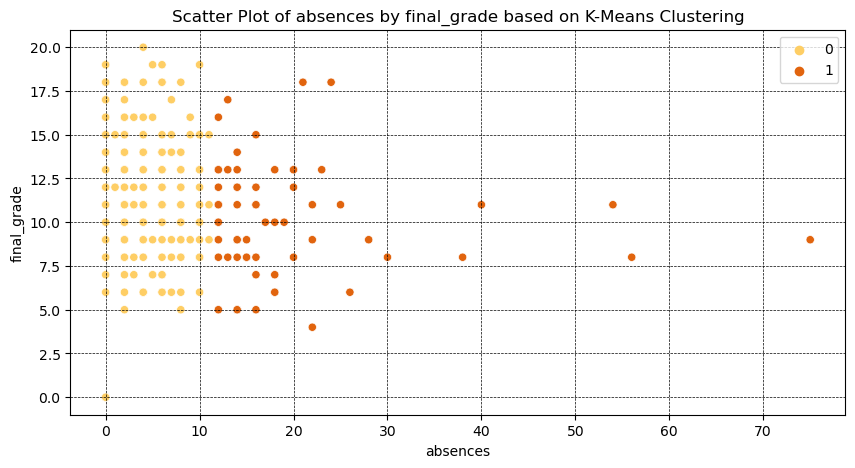

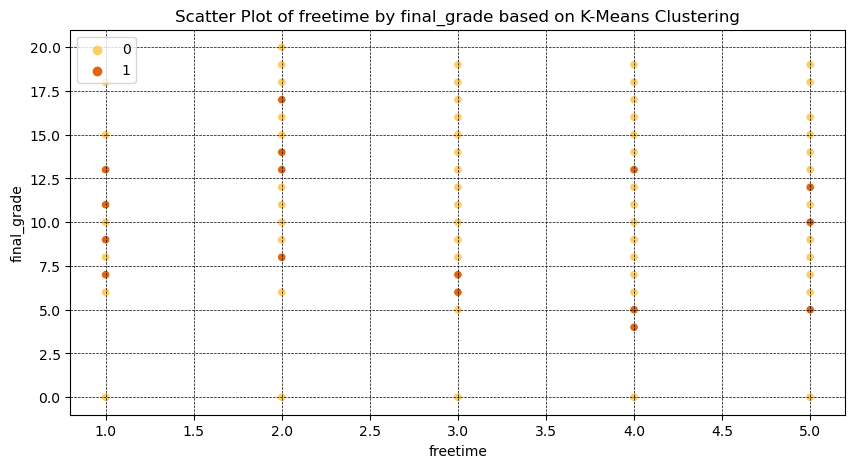

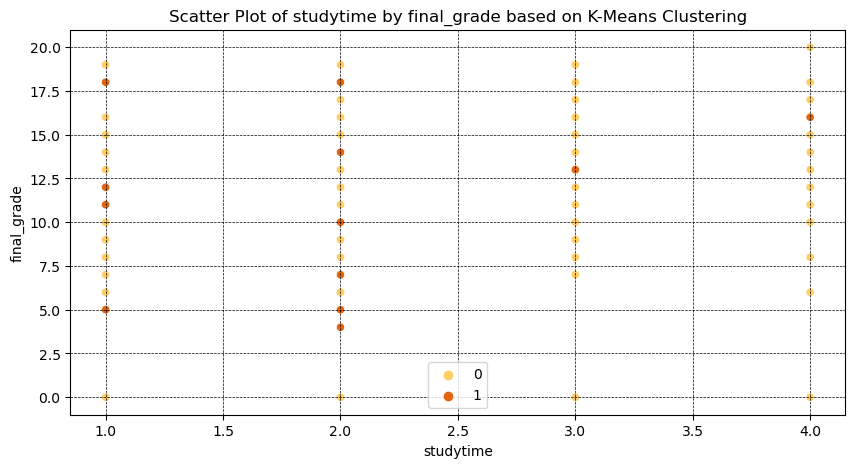

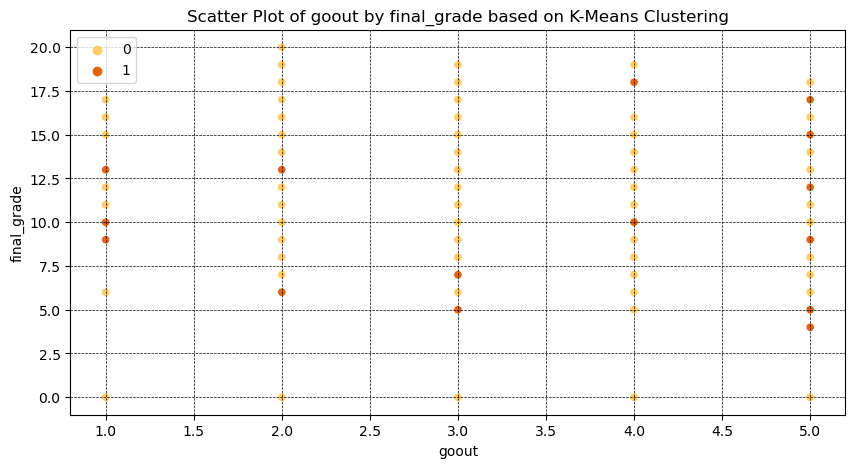

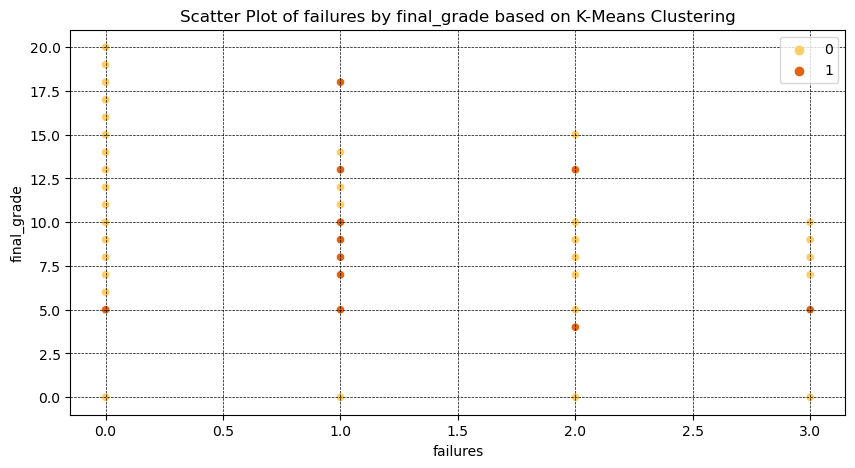

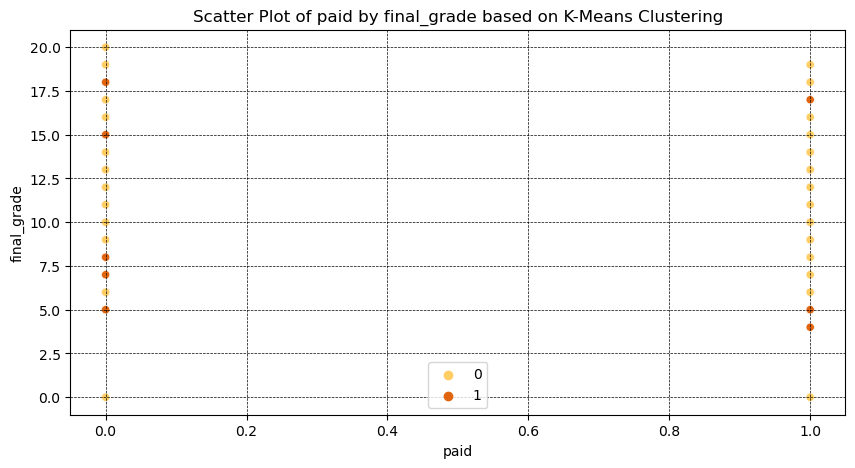

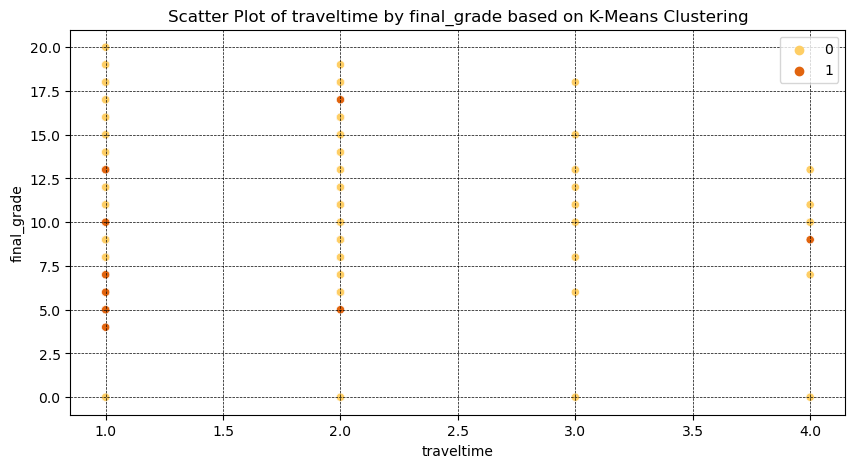

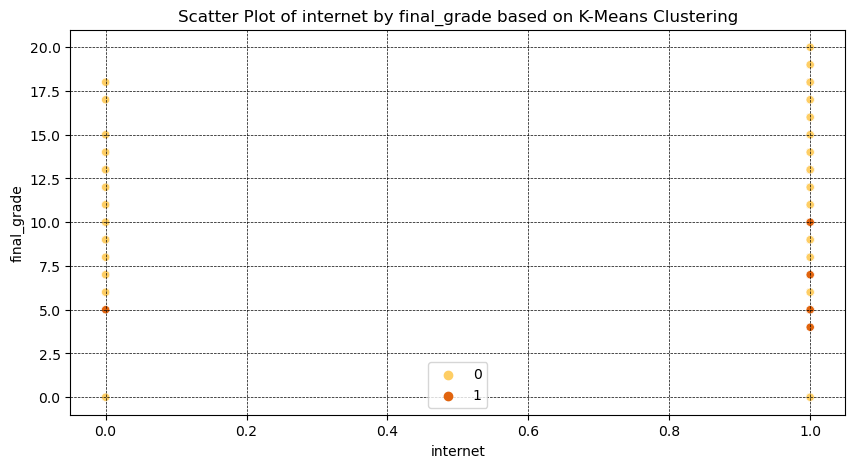

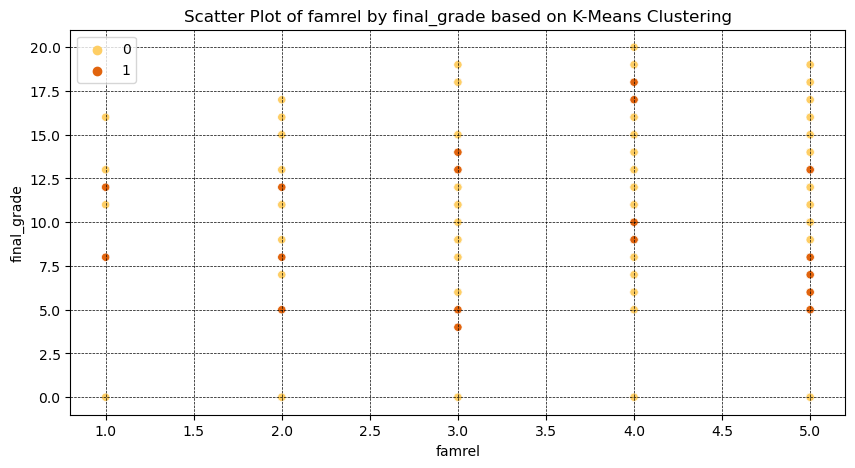

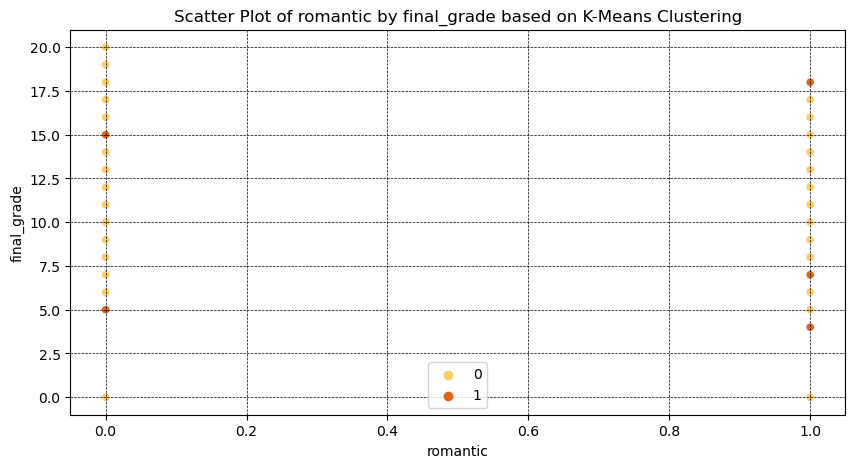

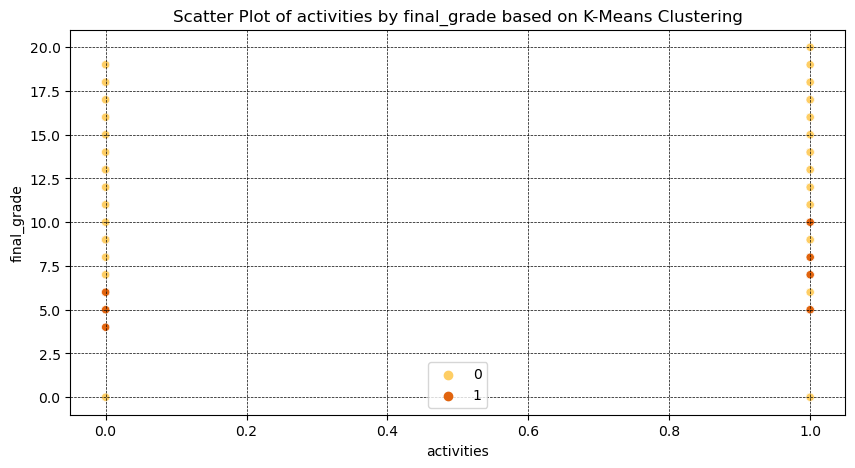

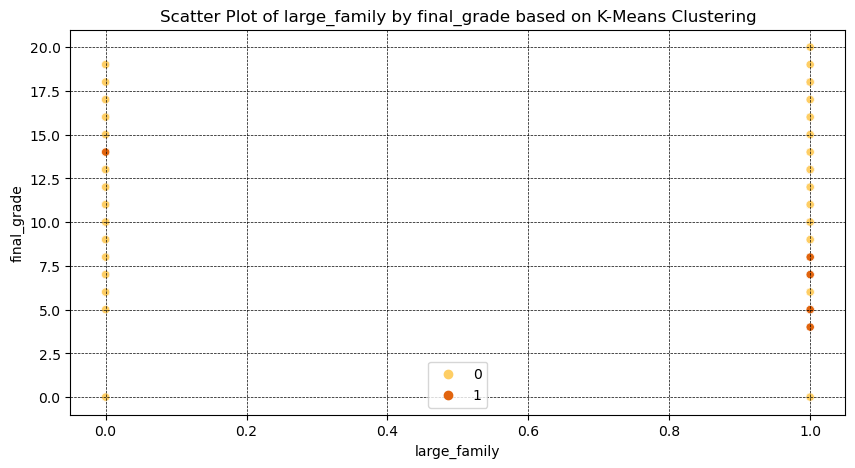

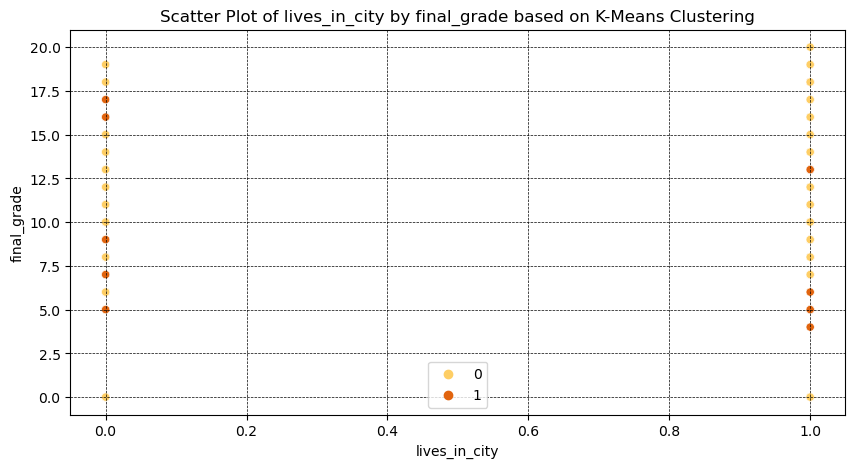

In [56]:
# next we will plot graphs for all of the above discriminatory variables
difference = pd.DataFrame(km_best_model.cluster_centers_, columns = X_rf.columns)

# Calculate the absolute difference in means between clusters for each variable
feature_importance = difference.diff().abs().iloc[1]

# Sort variables based on their contribution to feature importance
imp_ordered_indices = feature_importance.sort_values(ascending = False)
# Create scatter plots
for var in orderedvariables["featured_variables"]:
    plt.figure(figsize=(10, 5))
    plt.grid(True, linestyle='--', color='black', linewidth=0.5)
    sns.scatterplot(data=combined_dataframe, x=var, y="final_grade", hue='Cluster', palette='YlOrBr', legend='full')
    # now setting the title of the graph along with the titles of x-axis and y-axis
    plt.title(f'Scatter Plot of {var} by final_grade based on K-Means Clustering')
    plt.xlabel(var)
    plt.ylabel("final_grade")

    # Display the legend
    plt.legend()

    plt.show()

Interpretation:

Results Summary:

- Indicating a positive value, the Family Relationships (famrel) feature suggests that Cluster 0 tends to exhibit higher scores in family relationships.
- In terms of freetime, Cluster 0 is characterized by elevated scores.
- Improved attendance is observed in Cluster 0, as reflected by lower absences among its students.
- Moderate goout scores and higher studytime scores are associated with Cluster 0.
- Students in Cluster 0 experience shorter travel times, indicated by lower traveltime scores.
- The presence of internet, residing in the city, and having a large family are common traits in Cluster 0.
- Cluster 1 is characterized by higher goout scores, suggesting increased social activity.
- Elevated freetime scores and lower studytime scores are associated with Cluster 1.
- Longer travel times are indicated by slightly higher traveltime scores for Cluster 1 students.
- Higher final grades are observed in Cluster 1, indicating potentially better academic performance.
- Common traits such as internet presence, city residence, and involvement in extracurricular activities persist in Cluster 1.
- Attendance at extra paid classes remains common in Cluster 1.

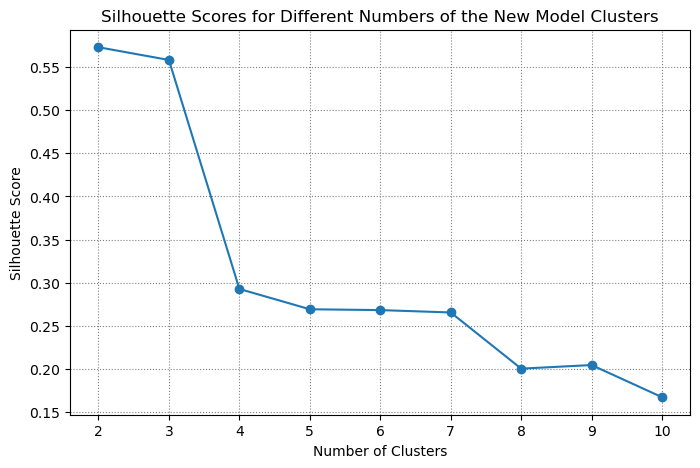

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Part a: Determine the Optimal Number of Clusters
silhouette_scores = []
possible_n_clusters = range(2, 11)

for n_clusters in possible_n_clusters:
    hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(possible_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of the New Model Clusters')
plt.grid(True, linestyle=':', color='gray')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [49]:
# Identify the optimal number of clusters
optimal_n_clusters = possible_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal Number of Clusters: {optimal_n_clusters}')

Optimal Number of Clusters: 2


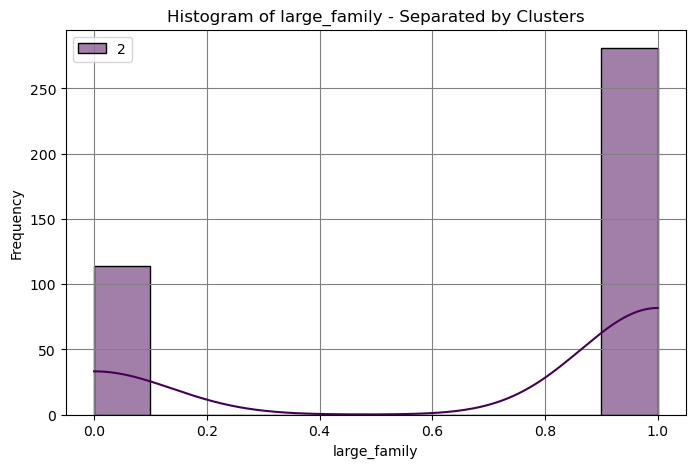

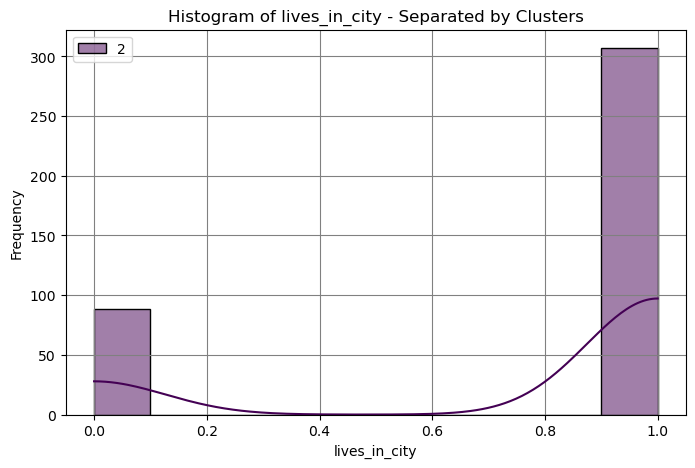

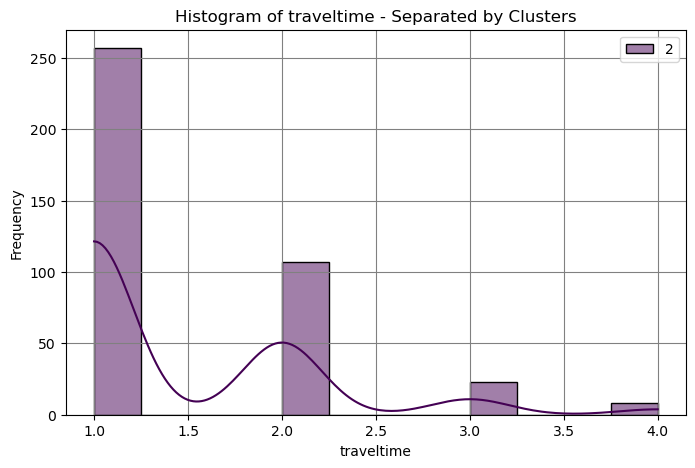

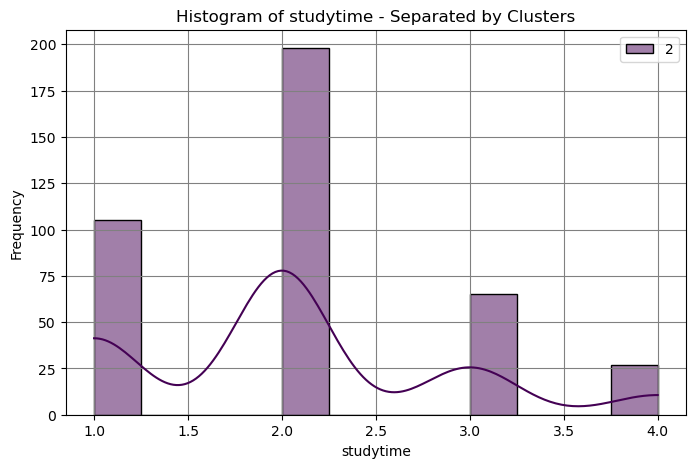

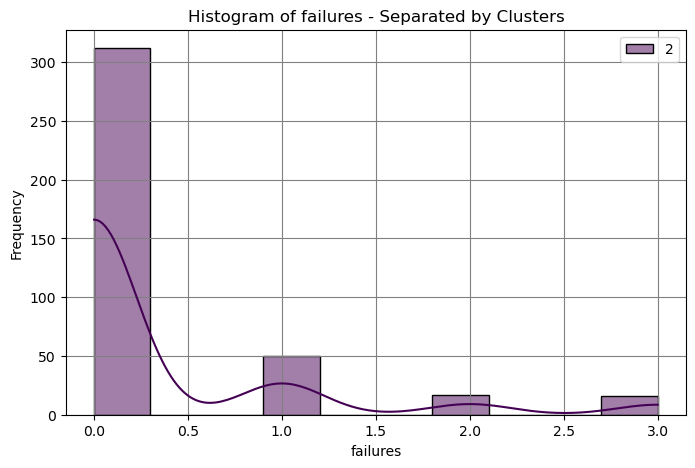

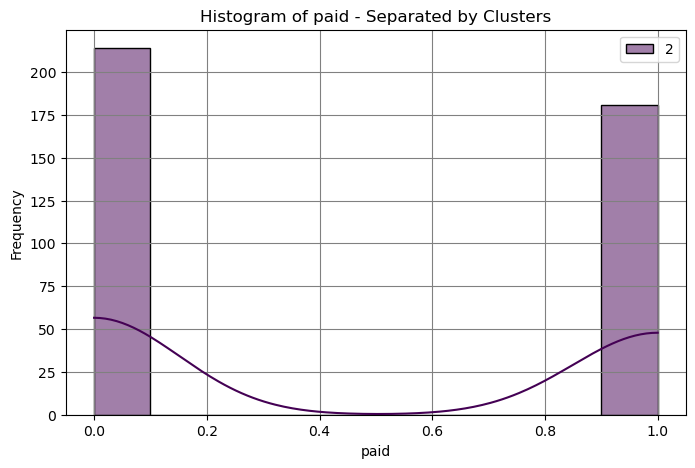

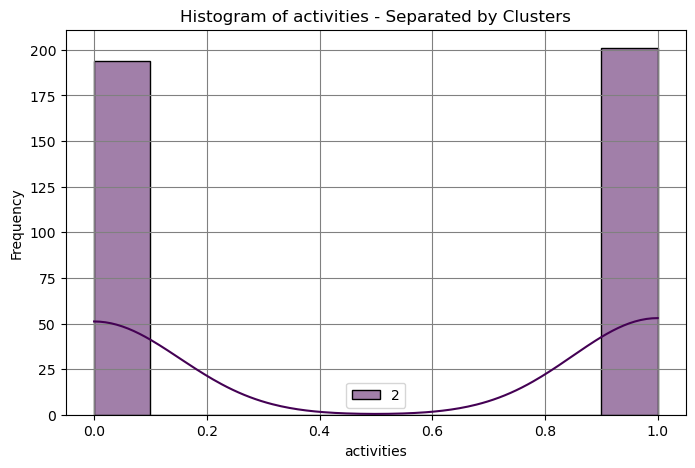

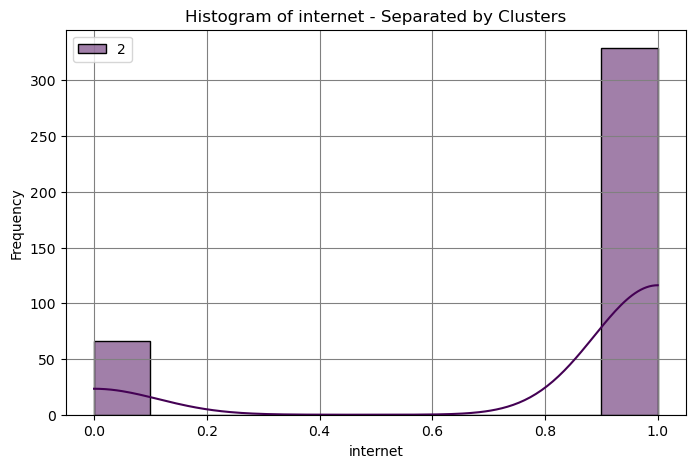

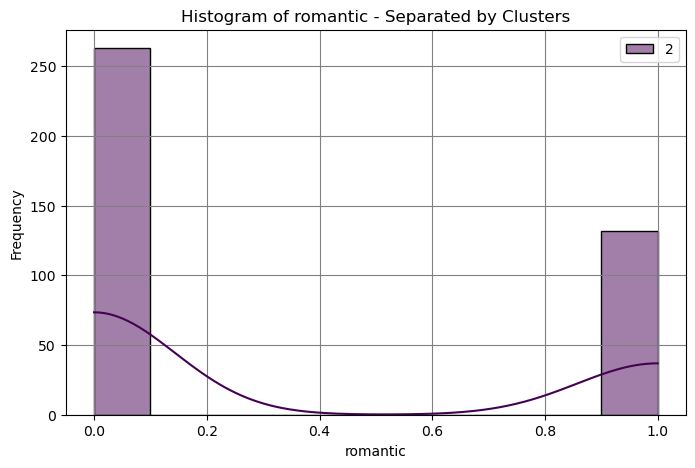

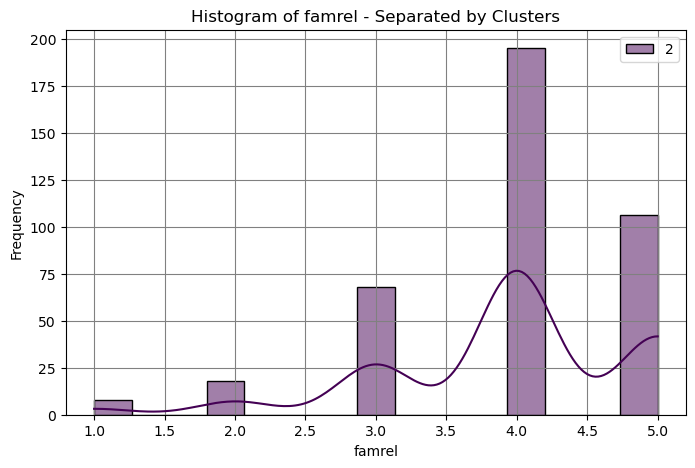

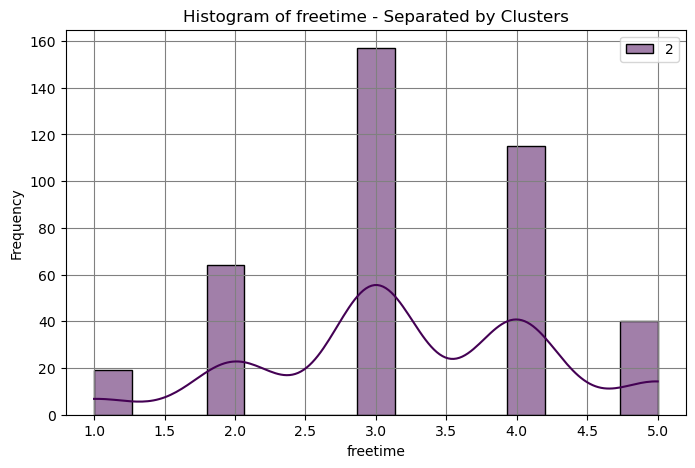

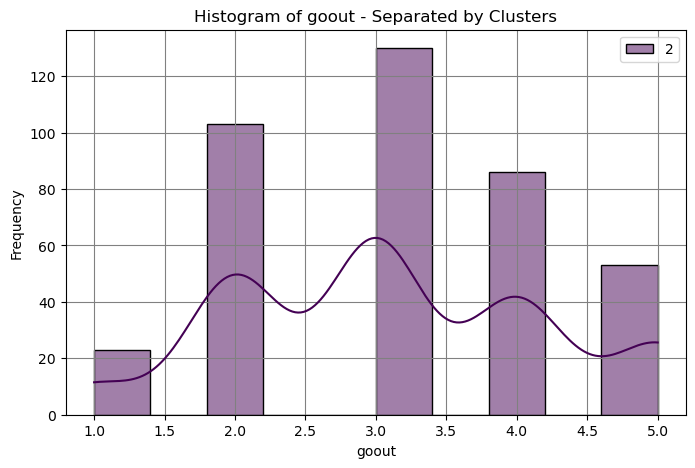

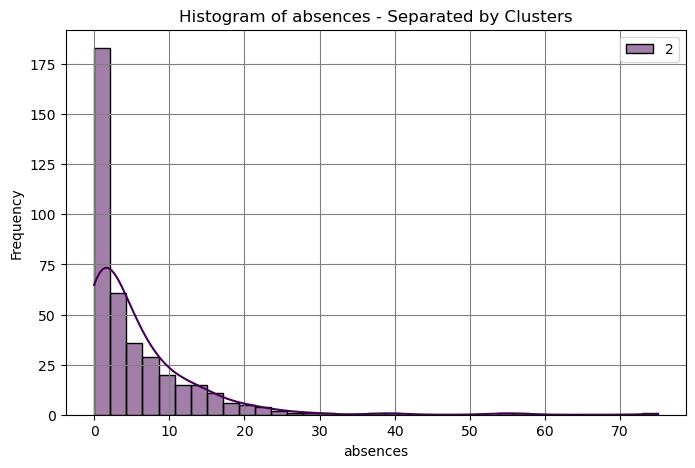

In [60]:
from scipy.cluster.hierarchy import linkage
# Perform Hierarchical Clustering
linkage_matrix = linkage(X, method='ward')

for i in X.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=X, x=i, hue=best_optnum, palette='viridis', kde=True)
    plt.grid(True, linestyle='-', color='gray')
    plt.title(f'Histogram of {i} - Separated by Clusters')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    #plt.legend(title='Clusters')
    plt.show()


Hierarchial Clustering is used because 
- The dataset comprises a combination of binary and numeric variables, such as binary indicators like "lives_in_city" and numeric variables like "traveltime" or "absences." Hierarchical clustering inherently accommodates this diverse set of variable types, eliminating the need for extensive preprocessing steps.
- The algorithm establishes a tree-like structure known as a dendrogram, offering the flexibility to explore clusters at various hierarchical levels. This hierarchical representation proves particularly advantageous when confronted with a range of student characteristics, enhancing the depth of understanding regarding subgroupings.
- Furthermore, hierarchical clustering unveils not just associations between individual data points but also relationships between clusters, providing valuable insights into how specific student attributes converge to form broader patterns.
- Hierarchial Clustering uses nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 
- Above we used ward, where it is used to minimize the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function.
- In summary we can say that hierarchial clustering is advantageous when dealing with datasets that exhibit a hierarchical structure, when the number of clusters is unknown or varies, and when there is a need for a more flexible approach to cluster shapes and sizes. 